## DecisionTreeClassifier


In [1]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2950 sha256=c89b4e002197f31d51268a04c047990991cff51385a88ddcf7273f50731e477f
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


applying the DT classifier

In [7]:
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np

In [8]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [9]:
tree_clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [10]:
X.shape, y.shape

((150, 2), (150,))

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

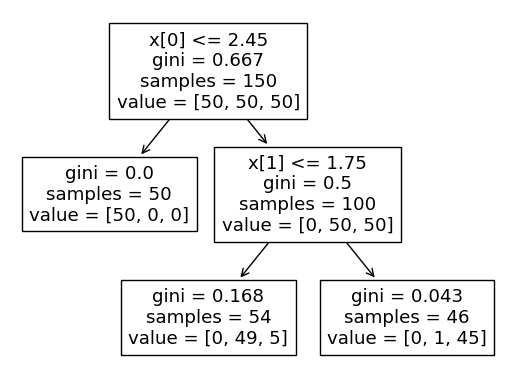

In [11]:
tree.plot_tree(tree_clf)

In [15]:
tree_clf.get_depth()

2

### DT Overfitting

In [16]:
from sklearn.datasets import make_moons

In [17]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = tree.DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = tree.DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [18]:
 deep_tree_clf1.get_depth(), deep_tree_clf2.get_depth()

(7, 6)

[Text(0.35714285714285715, 0.9375, 'x[1] <= -0.092\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.14285714285714285, 0.8125, 'x[0] <= 1.195\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.07142857142857142, 0.6875, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.21428571428571427, 0.6875, 'x[1] <= -0.43\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.14285714285714285, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.5625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5714285714285714, 0.8125, 'x[0] <= 1.36\ngini = 0.441\nsamples = 73\nvalue = [49, 24]'),
 Text(0.5, 0.6875, 'x[0] <= -0.379\ngini = 0.316\nsamples = 61\nvalue = [49, 12]'),
 Text(0.42857142857142855, 0.5625, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.5714285714285714, 0.5625, 'x[0] <= 0.466\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.42857142857142855, 0.4375, 'x[1] <= 0.769\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.3571

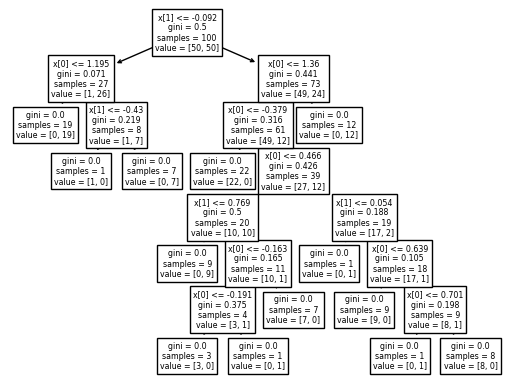

In [19]:
 tree.plot_tree(deep_tree_clf1)

# DecisionTreeRegressor

Example 1

In [20]:
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt

In [21]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

In [22]:
np.random.seed(42)
m = 200 # number of samples
n = 1 # numer of features
X = np.random.rand(m, n)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [23]:
X.shape, y.shape

((200, 1), (200, 1))

In [24]:
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.197\nsquared_error = 0.098\nsamples = 200\nvalue = 0.354'),
 Text(0.25, 0.5, 'x[0] <= 0.092\nsquared_error = 0.038\nsamples = 44\nvalue = 0.689'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.018\nsamples = 20\nvalue = 0.854'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.013\nsamples = 24\nvalue = 0.552'),
 Text(0.75, 0.5, 'x[0] <= 0.772\nsquared_error = 0.074\nsamples = 156\nvalue = 0.259'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.015\nsamples = 110\nvalue = 0.111'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.036\nsamples = 46\nvalue = 0.615')]

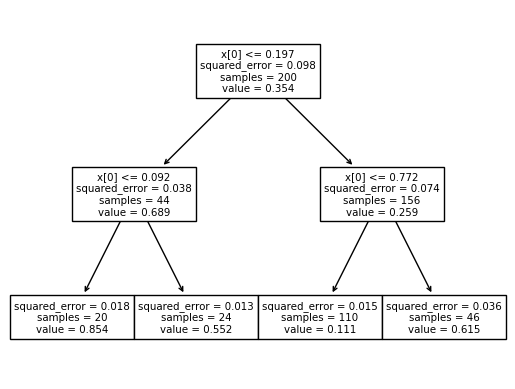

In [25]:
tree.plot_tree(tree_reg)

In [26]:
np.where((X[:, 0] < 0.197))[0].shape, np.where((X[:, 0] >= 0.197))[0].shape # 2nd depth, left and right node

((44,), (156,))

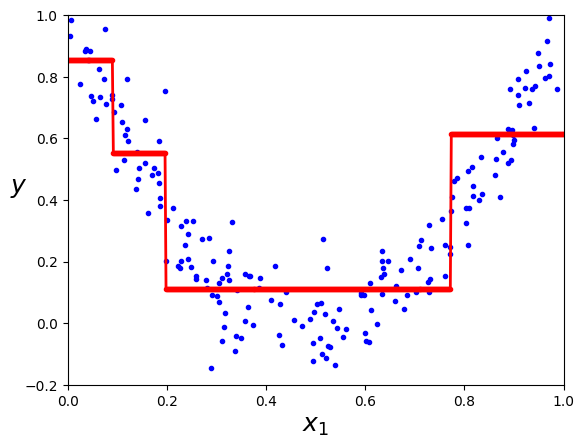

In [27]:
 plot_regression_predictions(tree_reg, X, y)

In [28]:
tree_reg.predict([[0.6]])

array([0.11063973])

In [29]:
tree_reg.max_depth, tree_reg.tree_.node_count

(2, 7)

### Example 2

In [30]:
tree_reg1 = tree.DecisionTreeRegressor(random_state=42)
tree_reg2 = tree.DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

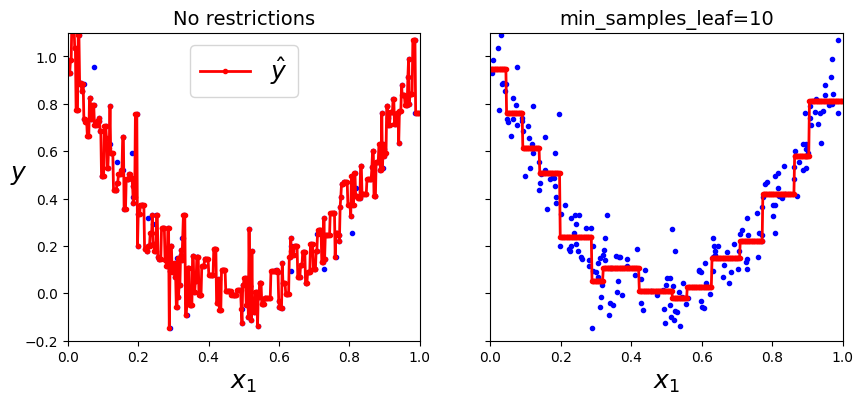

In [31]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()